In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

### VM1 1/2CPU
### VM2 1/4CPU
### VM3 1/8CPU

In [3]:
vm1cpu = 1/2
vm2cpu = 1/4
vm3cpu = 1/8

In [16]:
N = [10, 100, 1000]

In [5]:
lamda = 0.9

In [6]:
#Decide type of vm
def getTypeVM():
    vmRan=random.random()
    cpu = 0
    if(vmRan <= 1/3):
        cpu = 1/2
    elif(vmRan<=2/3):
        cpu = 1/4
    else:
        cpu = 1/8
    return cpu

In [7]:
def getNumberVMs(n):
    vmno=0
    for i in range(n):
        if(random.random() <= lamda):
            vmno+=1
    return vmno

In [194]:
def checkdeparture(servers):
    for m in range(len(servers)):
        qLen = len(servers[m]['res'])
        for j in range(qLen):
            if(servers[m]['res'][j] == vm1cpu):
                if(random.random() <= 1/10 ):
                    del servers[m]['res'][j]
                    del servers[m]['slot'][j]
            elif(servers[m]['res'][j] == vm2cpu):
                if(random.random() <= 1/8 ):
                    del servers[m]['res'][j]
                    del servers[m]['slot'][j]
            elif(servers[m]['res'][j] == vm3cpu):
                if(random.random() <= 1/30 ):
                    del servers[m]['res'][j]
                    del servers[m]['slot'][j]


In [183]:
def getONServers(servers):
    server_count = 0
    for s in servers:
        if(len(s['res'])>0):
            server_count += 1
    return server_count

# First Fit

In [195]:
servers = []
sever_num = []
result=[]
for n in N:
    for i in range(10**2):
        checkdeparture(servers)
        for k in range(getNumberVMs(n)):
            requestedRes = getTypeVM()
            serverLen = len(servers)
            if(serverLen == 0):
                servers.append({'res' : [requestedRes],'slot' : [i]})
            else:
                found = False
                for j in range(serverLen):
                    res = np.sum(servers[j]['res'])+requestedRes
                    if(res <= 1.0):
                        servers[j]['res'].append(requestedRes)
                        servers[j]['slot'].append(i)
                        found = True
                        break
                if(not found):
                    servers.append({'res': [requestedRes],'slot': [i]})

        server_count = 0
        for s in servers:
            if(len(s['res'])>0):
                server_count += 1
        sever_num.append(server_count)
    result.append(np.mean(sever_num))

IndexError: list index out of range

In [188]:
print(result)

[31.670000000000002, 169.06999999999999, 1117.6066666666666]


In [187]:
plt.plot(result)

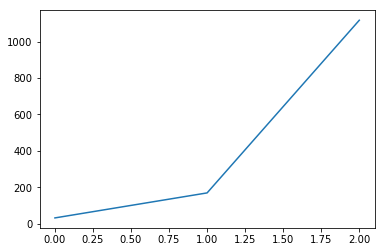

In [189]:
plt.show()

In [10]:
print(getONServers(servers))

37


In [11]:
len(servers)

45

In [12]:
servers

[{'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9886, 9969, 9973, 9979, 9981, 9990, 9994, 9996]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9938, 9940, 9955, 9963, 9966, 9975, 9990, 9991]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9917, 9934, 9955, 9966, 9978, 9979, 9982, 9994]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9952, 9962, 9978, 9985, 9986, 9989, 9992, 9995]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9923, 9949, 9984, 9987, 9988, 9989, 9995, 9998]},
 {'res': [0.125, 0.125, 0.125, 0.25, 0.125, 0.125, 0.125],
  'slot': [9952, 9968, 9980, 9995, 9995, 9996, 9997]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9921, 9948, 9961, 9967, 9986, 9986, 9993, 9996]},
 {'res': [0.125, 0.125, 0.125, 0.25, 0.125, 0.25],
  'slot': [9939, 9966, 9970, 9990, 9993, 9998]},
 {'res': [0.125, 0

In [13]:
np.min(sever_num)

4

In [14]:
np.max(sever_num)

45

In [15]:
np.mean(sever_num)

37.815899999999999

# Best Fit

In [29]:
servers = []
sever_num=[]
result=[]
for n in N:
    for i in range(10**2):
        checkdeparture(servers)
        for k in range(getNumberVMs(n)):
            requestedRes = getTypeVM()
            serverLen = len(servers)
            if(serverLen == 0):
                servers.append({'res' : [requestedRes],'slot' : [i]})
            else:
                maxN = -1
                maxI= -1
                resholder = -1
                found = False
                for j in range(serverLen):
                    res = np.sum(servers[j]['res']) + requestedRes
                    if(res == 1.0):
                        servers[j]['res'].append(requestedRes)
                        servers[j]['slot'].append(i)
    #                     print('1111111111111111')
                        found = True
                        break
                    else:
                        if(maxN < res and res <1):
                            maxN = res
                            resholder = requestedRes
                            maxI = j
    #                 print("#############", j, maxN)
                if(maxI != -1):
                    servers[maxI]['res'].append(resholder)
                    servers[maxI]['slot'].append(i)
    #                 print('^^^^^^^^^^^^', maxI, '%%%%%%%%%', resholder, "*******", maxN)
                    found = True
    #             print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&", maxI)
                if(not found):
    #                 print('22222222222')
                    servers.append({'res': [requestedRes],'slot': [i]})
    #             print()
    #             print()
        server_count = 0
        for s in servers:
            if(len(s['res'])>0):
                server_count += 1
        sever_num.append(server_count)
    result.append(np.mean(sever_num))

In [30]:
print(result)

[36.869999999999997, 182.51499999999999, 1180.04]


In [17]:
servers

[{'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9933, 9944, 9957, 9958, 9987, 9989, 9997, 9998]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9854, 9883, 9939, 9941, 9965, 9980, 9981, 9995]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9931, 9934, 9973, 9977, 9995, 9996, 9998, 9999]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9917, 9951, 9971, 9977, 9979, 9989, 9992, 9996]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.25, 0.125],
  'slot': [9939, 9962, 9972, 9986, 9992, 9996, 9999]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9893, 9938, 9947, 9961, 9973, 9986, 9994, 9998]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9967, 9970, 9972, 9972, 9978, 9990, 9994, 9997]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9900, 9947, 9954, 9960, 9967, 9991, 9997

In [18]:
np.mean(sever_num)

43.302300000000002

2


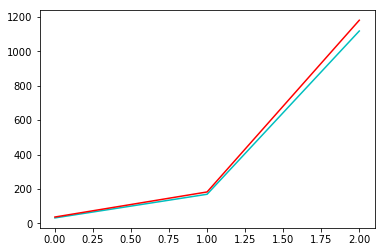

In [193]:
plt.plot([31.670000000000002, 169.06999999999999, 1117.6066666666666], color ='c')
plt.plot([36.869999999999997, 182.51499999999999, 1180.04], color='r')
plt.show()

In [197]:
213

213

In [200]:
for a in range(10):
    for b in range(10):
        for c in range(10):
            if((a+3/4*b+2*c)<=3 and (a+2/3*b+4/3*c)<=2 and (2*a+2*b+c)<=4):
                print(a, b, c)

0 0 0
0 0 1
0 1 0
0 1 1
0 2 0
1 0 0
1 1 0
2 0 0


In [202]:
np.sort([3,4,5,1,214])

array([  1,   3,   4,   5, 214])

In [203]:
lis=[{'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9969, 9973, 9979, 9981, 9990, 9994, 9996]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9963, 9966, 9975, 9990, 9991]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9966, 9978, 9979, 9982, 9994]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9962, 9978, 9985, 9986, 9989, 9992, 9995]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9984, 9987, 9988, 9989, 9995, 9998]},
 {'res': [0.125, 0.125, 0.25, 0.125, 0.125, 0.125],
  'slot': [9968, 9980, 9995, 9995, 9996, 9997]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9961, 9967, 9986, 9986, 9993, 9996]},
 {'res': [0.125, 0.125, 0.25, 0.125, 0.25],
  'slot': [9966, 9970, 9990, 9993, 9998]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9971, 9974, 9982, 9987, 9988, 9992, 9996, 9998]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.25],
  'slot': [9973, 9983, 9983, 9987, 9990, 9997]}]

In [208]:
lis=sorted(lis, key = lambda i: i['slot'])

In [209]:
lis

[{'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9961, 9967, 9986, 9986, 9993, 9996]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9962, 9978, 9985, 9986, 9989, 9992, 9995]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9963, 9966, 9975, 9990, 9991]},
 {'res': [0.125, 0.125, 0.25, 0.125, 0.25],
  'slot': [9966, 9970, 9990, 9993, 9998]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9966, 9978, 9979, 9982, 9994]},
 {'res': [0.125, 0.125, 0.25, 0.125, 0.125, 0.125],
  'slot': [9968, 9980, 9995, 9995, 9996, 9997]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9969, 9973, 9979, 9981, 9990, 9994, 9996]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9971, 9974, 9982, 9987, 9988, 9992, 9996, 9998]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.25],
  'slot': [9973, 9983, 9983, 9987, 9990, 9997]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [9984, 998

In [234]:
servers= [[]]

In [232]:
servers.append({''})

[[]]

In [229]:
servers

[[{'res': 1}, {'res': 1}, {'res': 2}], {'res': 2}]